<a href="https://colab.research.google.com/github/passah2o/pygeoflood/blob/master/examples/fim_workflow_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Install pygeoflood
See README.md installation instructions.

On Google Colab, run the following command to install pygeoflood:
```bash
%pip install git+https://github.com/passah2o/pygeoflood
```

### Import libraries


In [1]:
from pathlib import Path
from pygeoflood import PyGeoFlood

### Instantiate PyGeoFlood model class


In [2]:
pgf = PyGeoFlood()

### Set paths to input datasets with our model instance


In [3]:
pgf.dem_path = "data/OC1mTest.tif"
pgf.flowline_path = "data/Flowline.shp"
pgf.catchment_path = "data/Catchment.shp"

# # we are not using these datasets for this example
# pgf.streamflow_forecast_path = "data/prod_nwm.t00z.analysis_assim.channel_rt.tm00.conus.nc"
# pgf.custom_flowline_path = Path(data_dir, "NHDPlus_H_1209_HU4_GDB.gdb")

### Download input datasets if necessary

In [4]:
# make data directory if it doesn't exist
if not Path("data").is_dir():
    Path("data").mkdir()
# download input datasets if they doesn't exist
# DEM from USGS 3DEP
if not pgf.dem_path.is_file():
    !curl https://utexas.box.com/shared/static/id0in7w8yn38o59sexa50aqunsr7mzk0.tif -Lso data/OC1mTest.tif
# flowlines and catchments from NFIE (NHD MR) dataset
# https://www.arcgis.com/home/webmap/viewer.html?webmap=9766a82973b34f18b43dafa20c5ef535
if not pgf.flowline_path.is_file():
    !curl -sL https://utexas.box.com/shared/static/s1vlnymonbidnhul52oja7s83ky1212j.tgz | tar -xz -C data
if not pgf.catchment_path.is_file():
    !curl -sL https://utexas.box.com/shared/static/jzawwvmb2tjl4yqtnitgvfjcc4ho4tg5.tgz | tar -xz -C data

### Run full GeoFlood flood inundation mapping workflow

In [5]:
# set constant flowrate since we don't have a streamflow forecast
# see docs for `PyGeoFlood.config` and `PyGeoFlood.calculate_flood_stage`

pgf.config = {"calculate_flood_stage": {"custom_Q": 500}}

pgf.run_fim_workflow()

Running apply_nonlinear_filter with parameters:
    custom_path = None
    method = PeronaMalik2
    smoothing_quantile = 0.9
    time_increment = 0.1
    n_iter = 50
    sigma_squared = 0.05
Computing slope of raw DTM
DEM slope array shape: (3378, 4750)
Computing lambda = q-q-based nonlinear filtering threshold
DEM smoothing Quantile: 0.9
Edge Threshold Value: 0.34356024861335754
Filtered DEM written to data/OC1mTest_filtered.tif
apply_nonlinear_filter completed in 9.0796 seconds

Running calculate_slope with parameters:
    custom_path = None
 slope statistics
 min angle: 0.0
 max angle: 54.863846043721324
 mean slope: 0.13960592
 stdev slope: 0.15432632
Slope raster written to data/OC1mTest_slope.tif
calculate_slope completed in 1.2224 seconds

Running calculate_curvature with parameters:
    custom_path = None
    method = geometric
 using geometric curvature
 curvature statistics
 non-nan curvature cell number: 16045500
 non-nan finite curvature cell number:  mean:  -0.00031314598

### Plot flood inundation map

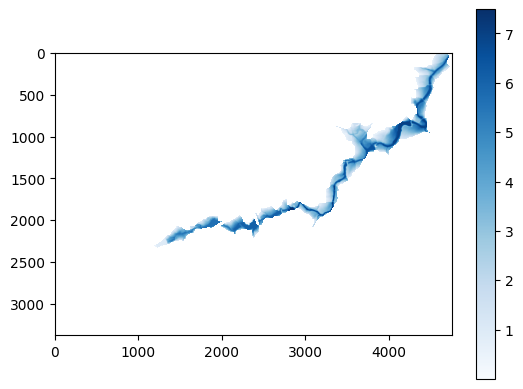

In [6]:
import matplotlib.pyplot as plt
import rasterio as rio

with rio.open(pgf.fim_path) as ds:
    fim = ds.read(1)

plt.imshow(fim, cmap="Blues")
plt.colorbar()
plt.show()

All output files are saved in the `data` directory and can be downloaded for viewing with a GIS software such as QGIS

In [7]:
# save output data file paths we can load our PyGeoFlood instance later with
# pgf = PyGeoFlood.from_paths("data/paths.txt")
pgf.to_paths("data/paths.txt")

Paths written to data/paths.txt
